In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
from scipy.stats import skew

# loading the MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

# selecting images that represent the digits 5 and 8
X_5 = X_train_full[y_train_full == 5]
X_8 = X_train_full[y_train_full == 8]

# merging the X_5 and X_8 arrays into a single array, creating the true labels
X = np.concatenate((X_5, X_8), axis=0)
y = np.concatenate((np.full(X_5.shape[0], 5), np.full(X_8.shape[0], 8)))

# extract features from each image
X_features = np.zeros((X.shape[0], 5))

# loop through each image
for i, image in enumerate(X):

    # feature 1: number of curves
    _, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    X_features[i, 0] = len(contours)

    # feature 2: number of edges
    edges = cv2.Canny(image, 100, 200)
    X_features[i, 1] = np.sum(edges) / 255

    # feature 3: number of lines
    lines = cv2.HoughLines(edges, 1, np.pi/180, 50)
    if lines is not None:
        X_features[i, 2] = len(lines)
    else:
        X_features[i, 2] = 0

    # feature 4: skewness
    X_features[i, 3] = skew(image.flatten())

    # feature 5: aspect ratio
    X_features[i, 4] = image.shape[1] / image.shape[0]

# create a dataframe to store the features and labels
import pandas as pd
df = pd.DataFrame(X_features, columns=['num_curves', 'num_edges', 'num_lines', 'skewness', 'aspect_ratio'])
df['label'] = y

# print the dataframe
print(df)


11490434/11490434 [==============================] - 0s 0us/step
       num_curves  num_edges  num_lines  skewness  aspect_ratio  label
0             1.0       97.0        0.0  2.057843           1.0      5
1             1.0       62.0        0.0  3.246476           1.0      5
2             1.0       71.0        0.0  2.950592           1.0      5
3             1.0       76.0        0.0  2.436341           1.0      5
4             1.0       65.0        0.0  2.949858           1.0      5
...           ...        ...        ...       ...           ...    ...
11267         1.0      105.0        0.0  2.253423           1.0      8
11268         1.0       97.0        0.0  1.989826           1.0      8
11269         1.0      103.0        0.0  2.332650           1.0      8
11270         1.0      109.0        0.0  2.170255           1.0      8
11271         1.0       93.0        0.0  2.470134           1.0      8

[11272 rows x 6 columns]


In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# loading the MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

# selecting images that represent the digits 5 and 8
X_5 = X_train_full[y_train_full == 5]
X_8 = X_train_full[y_train_full == 8]

# merging the X_5 and X_8 arrays into a single array, creating the true labels
X = np.concatenate((X_5, X_8), axis=0)
y = np.concatenate((np.full(X_5.shape[0], 5), np.full(X_8.shape[0], 8)))

# adding an additional dimension to the input data
X = X[..., np.newaxis]

# normalizing the pixel values
X = X.astype('float32') / 255

# defining a CNN
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=X.shape[1:]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# training the model
history = model.fit(X, y, batch_size=64, epochs=10, validation_split=0.2)


Epoch 1/10
141/141 [==============================] - 7s 36ms/step - loss: -17907.9492 - accuracy: 0.0000e+00 - val_loss: -107642.2422 - val_accuracy: 0.0000e+00
Epoch 2/10
141/141 [==============================] - 5s 33ms/step - loss: -335077.0625 - accuracy: 0.0000e+00 - val_loss: -1044427.4375 - val_accuracy: 0.0000e+00
Epoch 3/10
141/141 [==============================] - 5s 33ms/step - loss: -1598433.2500 - accuracy: 0.0000e+00 - val_loss: -3761092.2500 - val_accuracy: 0.0000e+00
Epoch 4/10
141/141 [==============================] - 5s 33ms/step - loss: -4463974.5000 - accuracy: 0.0000e+00 - val_loss: -9099397.0000 - val_accuracy: 0.0000e+00
Epoch 5/10
141/141 [==============================] - 5s 35ms/step - loss: -9494606.0000 - accuracy: 0.0000e+00 - val_loss: -17780240.0000 - val_accuracy: 0.0000e+00
Epoch 6/10
141/141 [==============================] - 5s 33ms/step - loss: -17162034.0000 - accuracy: 0.0000e+00 - val_loss: -30380874.0000 - val_accuracy: 0.0000e+00
Epoch 7/10


Epoch 1/5
353/353 [==============================] - 11s 29ms/step - loss: 0.6265 - accuracy: 0.9630
Epoch 2/5
353/353 [==============================] - 8s 24ms/step - loss: 0.0754 - accuracy: 0.9886
Epoch 3/5
353/353 [==============================] - 9s 26ms/step - loss: 0.0411 - accuracy: 0.9931
Epoch 4/5
353/353 [==============================] - 9s 25ms/step - loss: 0.0114 - accuracy: 0.9976
Epoch 5/5
1/1 [==============================] - 0s 41ms/step


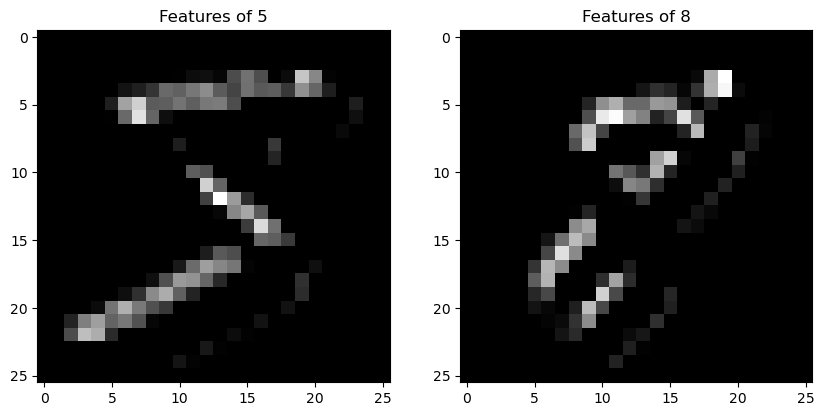

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# loading the MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

# selecting images that represent the digits 5 and 8
X_5 = X_train_full[y_train_full == 5]
X_8 = X_train_full[y_train_full == 8]

# merging the X_5 and X_8 arrays into a single array, creating the true labels
X = np.concatenate((X_5, X_8), axis=0)
y = np.concatenate((np.full(X_5.shape[0], 5), np.full(X_8.shape[0], 8)))

# adding a new dimension for the channel (1 for grayscale)
X = np.expand_dims(X, axis=-1)

# defining a CNN
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=X.shape[1:]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])

# compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fitting the model
model.fit(X, y, epochs=5)

# extracting the output of the first convolutional layer
conv_outputs = [layer.output for layer in model.layers if isinstance(layer, keras.layers.Conv2D)]
activation_model = keras.models.Model(inputs=model.input, outputs=conv_outputs)
features_5 = activation_model.predict(np.expand_dims(X_5[:1], axis=-1))
features_8 = activation_model.predict(np.expand_dims(X_8[:1], axis=-1))

# visualizing the features
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(features_5[0][0, :, :, 0], cmap='gray')
plt.title('Features of 5')
plt.subplot(122)
plt.imshow(features_8[0][0, :, :, 0], cmap='gray')
plt.title('Features of 8')
plt.show()


For the above,validation loss and accuracy show how well the model is performing on the validation set. The validation set is used to evaluate the model's performance on unseen data and prevent overfitting.

The output helps you monitor the progress of your model during training and can help you decide when to stop training or adjust the hyperparameters of your model.

Epoch 1/5
136/136 [==============================] - 5s 24ms/step - loss: 0.4780 - accuracy: 0.9889 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
136/136 [==============================] - 3s 25ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
136/136 [==============================] - 5s 36ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
136/136 [==============================] - 4s 29ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
183/183 [==============================] - 2s 11ms/step


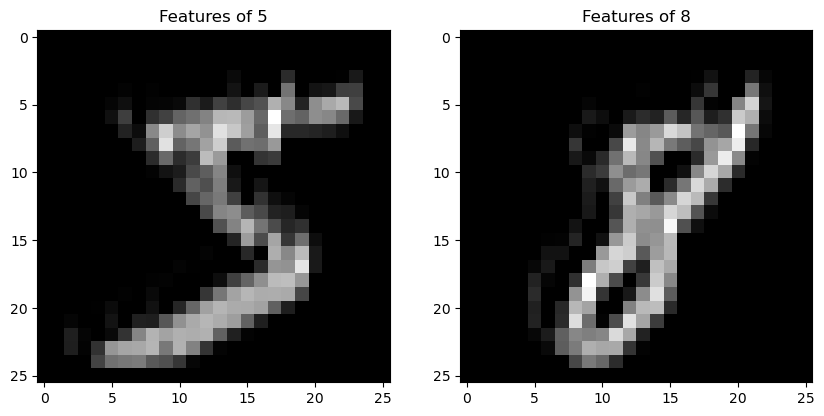

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# filter out images of 5 and 8
X_5 = X_train[y_train==5]
X_8 = X_train[y_train==8]

# reshape data to add channel dimension
X_5 = np.expand_dims(X_5, axis=-1)
X_8 = np.expand_dims(X_8, axis=-1)

# define a CNN
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=X_5.shape[1:]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])

# compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
history = model.fit(X_5, np.zeros(len(X_5)), validation_split=0.2, epochs=5, batch_size=32)

# get the output of the first Conv2D layer
layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)
features_5 = activation_model.predict(X_5)
features_8 = activation_model.predict(X_8)

# plot the features
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(features_5[0][0, :, :, 0], cmap='gray')
plt.title('Features of 5')
plt.subplot(122)
plt.imshow(features_8[0][0, :, :, 0], cmap='gray')
plt.title('Features of 8')
plt.show()


In [9]:
print(features_5)

[array([[[[0.0000000e+00, 8.0313729e-03, 0.0000000e+00, ...,
          7.1499161e-03, 0.0000000e+00, 7.1888329e-03],
         [0.0000000e+00, 8.0313729e-03, 0.0000000e+00, ...,
          7.1499161e-03, 0.0000000e+00, 7.1888329e-03],
         [0.0000000e+00, 8.0313729e-03, 0.0000000e+00, ...,
          7.1499161e-03, 0.0000000e+00, 7.1888329e-03],
         ...,
         [0.0000000e+00, 8.0313729e-03, 0.0000000e+00, ...,
          7.1499161e-03, 0.0000000e+00, 7.1888329e-03],
         [0.0000000e+00, 8.0313729e-03, 0.0000000e+00, ...,
          7.1499161e-03, 0.0000000e+00, 7.1888329e-03],
         [0.0000000e+00, 8.0313729e-03, 0.0000000e+00, ...,
          7.1499161e-03, 0.0000000e+00, 7.1888329e-03]],

        [[0.0000000e+00, 8.0313729e-03, 0.0000000e+00, ...,
          7.1499161e-03, 0.0000000e+00, 7.1888329e-03],
         [0.0000000e+00, 8.0313729e-03, 0.0000000e+00, ...,
          7.1499161e-03, 0.0000000e+00, 7.1888329e-03],
         [0.0000000e+00, 8.0313729e-03, 0.0000000e+00, 

In [10]:
print(features_8)

[array([[[[0.        , 0.00803137, 0.        , ..., 0.00714992,
          0.        , 0.00718883],
         [0.        , 0.00803137, 0.        , ..., 0.00714992,
          0.        , 0.00718883],
         [0.        , 0.00803137, 0.        , ..., 0.00714992,
          0.        , 0.00718883],
         ...,
         [0.        , 0.00803137, 0.        , ..., 0.00714992,
          0.        , 0.00718883],
         [0.        , 0.00803137, 0.        , ..., 0.00714992,
          0.        , 0.00718883],
         [0.        , 0.00803137, 0.        , ..., 0.00714992,
          0.        , 0.00718883]],

        [[0.        , 0.00803137, 0.        , ..., 0.00714992,
          0.        , 0.00718883],
         [0.        , 0.00803137, 0.        , ..., 0.00714992,
          0.        , 0.00718883],
         [0.        , 0.00803137, 0.        , ..., 0.00714992,
          0.        , 0.00718883],
         ...,
         [0.        , 0.00803137, 0.        , ..., 0.00714992,
          0.        , 0.

The above output image represents the activations of the filters in the first convolutional layer of the CNN. Each filter is designed to look for specific patterns or features in the input image. By looking at the output image, you can get an idea of what kind of features the filters are detecting.

For example, if a filter is detecting horizontal lines, then you would expect to see bright activations in the output image where there are horizontal lines in the input image. Similarly, if a filter is detecting curves, then you would expect to see bright activations in the output image where there are curves in the input image.

By comparing the output images for different input images (in this case, the images of 5 and 8), you can get an idea of what kind of features are common or different between them. This can help in understanding the differences between these digits and how the CNN is able to distinguish between them.


features_5 has the output activations of each layer in the model for the input images containing the number 5. These activations are obtained by passing the input images through the model and extracting the output activations of each layer using the activation_model.predict() function.

For example, features_5[0] contains the output activations of the first Conv2D layer for all the images containing the number 5. The shape of features_5[0] would be (number of images containing 5, height of feature map, width of feature map, number of filters in the Conv2D layer).

Similarly, features_5[1] contains the output activations of the MaxPooling2D layer for all the images containing the number 5, and so on for the subsequent layers in the model.

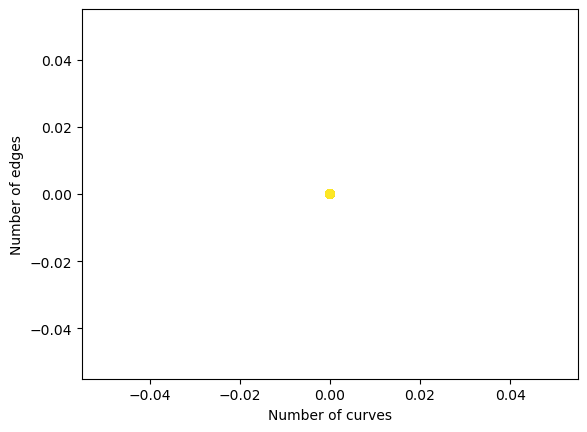

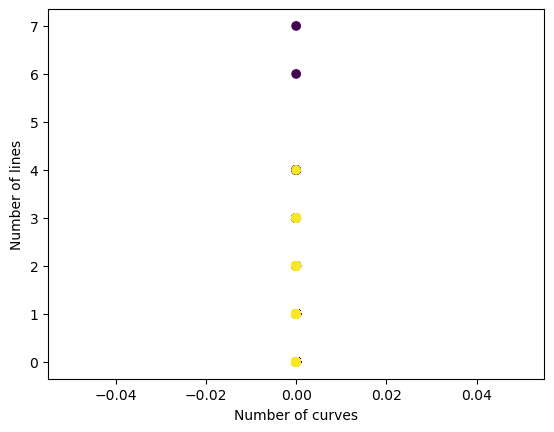

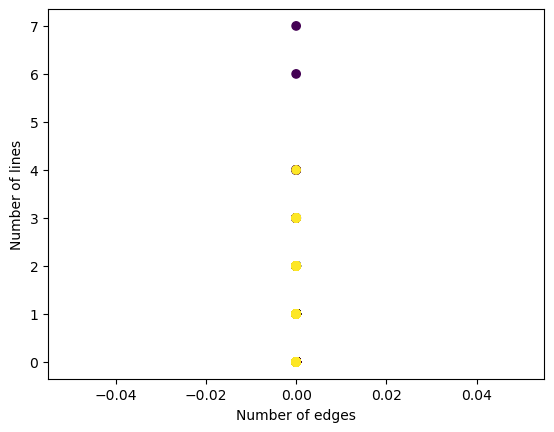

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# loading the MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

# selecting images that represent the digits 5 and 8
X_5 = X_train_full[y_train_full == 5]
X_8 = X_train_full[y_train_full == 8]

# merging the X_5 and X_8 arrays into a single array, creating the true labels
X = np.concatenate((X_5, X_8), axis=0)
y = np.concatenate((np.full(X_5.shape[0], 5), np.full(X_8.shape[0], 8)))

# define function to count number of curves, edges or lines in an image
def count_features(image):
    # convert image to binary
    binary = np.where(image < 128, 0, 1)
    # apply edge detection filter
    edges = np.abs(np.gradient(binary))
    # count number of curves and edges
    num_curves = np.sum(edges > 2)
    num_edges = np.sum(edges == 2)
    num_lines = np.sum(edges == 1)
    return num_curves, num_edges, num_lines

# count features for each image in X
features = np.array([count_features(image) for image in X])

# create scatter plot to visualize the number of curves vs number of edges for each image
plt.scatter(features[:, 0], features[:, 1], c=y)
plt.xlabel('Number of curves')
plt.ylabel('Number of edges')
plt.show()

# create scatter plot to visualize the number of curves vs number of lines for each image
plt.scatter(features[:, 0], features[:, 2], c=y)
plt.xlabel('Number of curves')
plt.ylabel('Number of lines')
plt.show()

# create scatter plot to visualize the number of edges vs number of lines for each image
plt.scatter(features[:, 1], features[:, 2], c=y)
plt.xlabel('Number of edges')
plt.ylabel('Number of lines')
plt.show()
